In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [16]:
nbie_data = pd.read_csv('nbie_log.csv')

nbie_data.columns = ['a']

nbie_data = nbie_data["a"].str.split("/", n = 1, expand = True) 

nbie_data.columns = ['1', '2']

keys = ['5987-579 ', 'Distance ']

dataframe_collection = {} 

for k in keys:
    new_data = nbie_data.loc[nbie_data['1'] == k]
    dataframe_collection[k] = pd.DataFrame(new_data, columns=["2"])
    
energies_ = []

for k in keys:
    d = dataframe_collection[k]
    temp = np.asarray(d['2'].tolist(), dtype=np.float32)
    energies_.append(temp)
    
energies_ = np.asarray(energies_)

print (type(energies_))

<class 'numpy.ndarray'>


-3.00559
8.1268


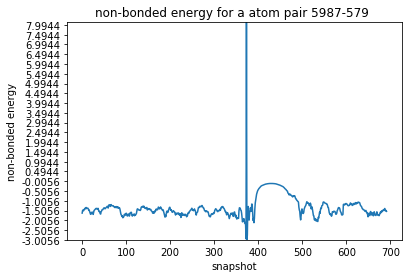

In [18]:
e = energies_[0] 
max = np.max(e)
min = np.min(e)
    
print(min)
print(max)

fig, ax = plt.subplots()

plt.plot(e)

name = keys[0]
t = 'non-bonded energy for a atom pair ' + name
ax.set(xlabel='snapshot', ylabel='non-bonded energy', title=t)

plt.ylim(min, max)  
y_ticks = np.arange(min, max, 0.5)
plt.yticks(y_ticks)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.savefig('non-bonded-analysis for pair ' + name)
plt.show()

0.159516
4.96842


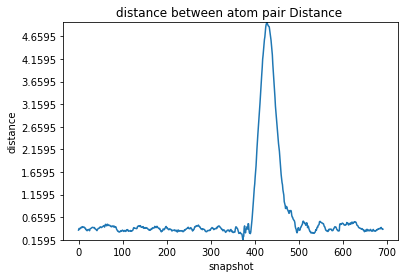

In [19]:
d = energies_[1] 
max = np.max(d)
min = np.min(d)
    
print(min)
print(max)

fig, ax = plt.subplots()

plt.plot(d)

name = keys[1]
t = 'distance between atom pair ' + name
ax.set(xlabel='snapshot', ylabel='distance', title=t)

plt.ylim(min, max)  
y_ticks = np.arange(min, max, 0.5)
plt.yticks(y_ticks)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.savefig('non-bonded-analysis for pair ' + name)
plt.show()

In [ ]:
sum = energies_.sum(axis=0)

max = np.max(sum)
min = np.min(sum)
    
print(min)
print(max)

fig, ax = plt.subplots()

ax.plot(sum)

ax.set(xlabel='snapshot', ylabel='non-bonded energy', title='non-bonded energy for a whole interaction group')

plt.ylim(min, max)  
y_ticks = np.arange(min, max, 0.1)
plt.yticks(y_ticks)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

plt.savefig('non-bonded-analysis for a whole interaction group')

plt.show()

In [ ]:
a = ([1, 1])
b = ([2, 3])
c = []
c.append(a)
c.append(b)
c


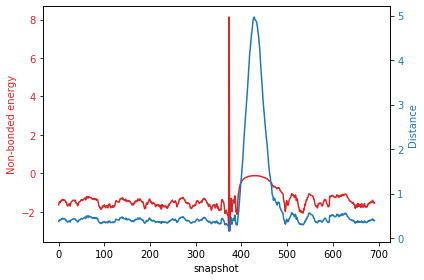

In [20]:
fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('snapshot')
ax1.set_ylabel('Non-bonded energy', color=color)
ax1.plot(e, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Distance', color=color)  # we already handled the x-label with ax1
ax2.plot(d, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('non-bonded-energy v distance')
plt.show()